In [1]:
import numpy as np
from sbi import analysis as analysis
import pickle
import torch
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from plt_utils import generateAxesForMultiplePlots, remove_inner_axes

In [2]:
# get GPU if possible
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print("CUDA Not Available")
    device = torch.device('cpu')
sam_path   = '/mnt/home/yjo10/ceph/ILI/SAM/one_click_sam'

CUDA Available


## Proposals

### observations

In [3]:
smf_obs    = np.load('observation/bernardi13_intp.npy')
smz_obs    = np.load('observation/smz.npy')
smfgas_obs = np.load('observation/smfgas.npy')

In [4]:
def plot(num=10, fname=''):
    proposal = np.load(f"./data/{fname}/params_{num}.npy")
    #(1.0,1.7,3.0,110.0,1.2,2E-03,0.1) this is fiducial
    #_ = analysis.pairplot(proposal, limits=[(1e-2,1e2), (1e-3,1e2), (1e-2,1e2), (1,1e3), (1e-1, 10), (1e-8, 0.1), (1e-4,10)], figsize=(15, 15))
    _ = analysis.pairplot(proposal, limits=[(0.25,4), (0.425,6.8), (1,5), (27.5,440), (0.6,2.4), (5e-4,0.008), (0.025,0.4)], figsize=(15, 15))
    #fig = plt.figure(figsize=(10,10))
    X, Y = 3,1
    fig, axes = generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,10),
                                          hspace=0.02,wspace=0.01)
    x = smf_obs[:,0]
    smf = np.load(f'{sam_path}/result/{fname}/smf_{num}.npy')
    axes[0].plot(x,smf.T, c='gray', alpha=0.7,lw=2)
    axes[0].plot(x,np.log10(smf_obs[:,1]), c='r',label="Bernardi",lw=4)
    axes[0].legend()
    x = smz_obs[:,0]
    smz = np.load(f'{sam_path}/result/{fname}/smz_{num}.npy')
    axes[1].plot(x,smz.T, c='gray', alpha=0.7,lw=2)
    axes[1].plot(x,smz_obs[:,1], c='r',label="Gallazi",lw=4)
    axes[1].legend()
    x = smfgas_obs[:,0]
    smgas = np.load(f'{sam_path}/result/{fname}/smgas_{num}.npy')
    axes[2].plot(x,smgas.T, c='gray', alpha=0.7,lw=2)
    axes[2].plot(x,smfgas_obs[:,1], c='r',label="Boselli",lw=4)
    axes[2].legend()


## Fiducial

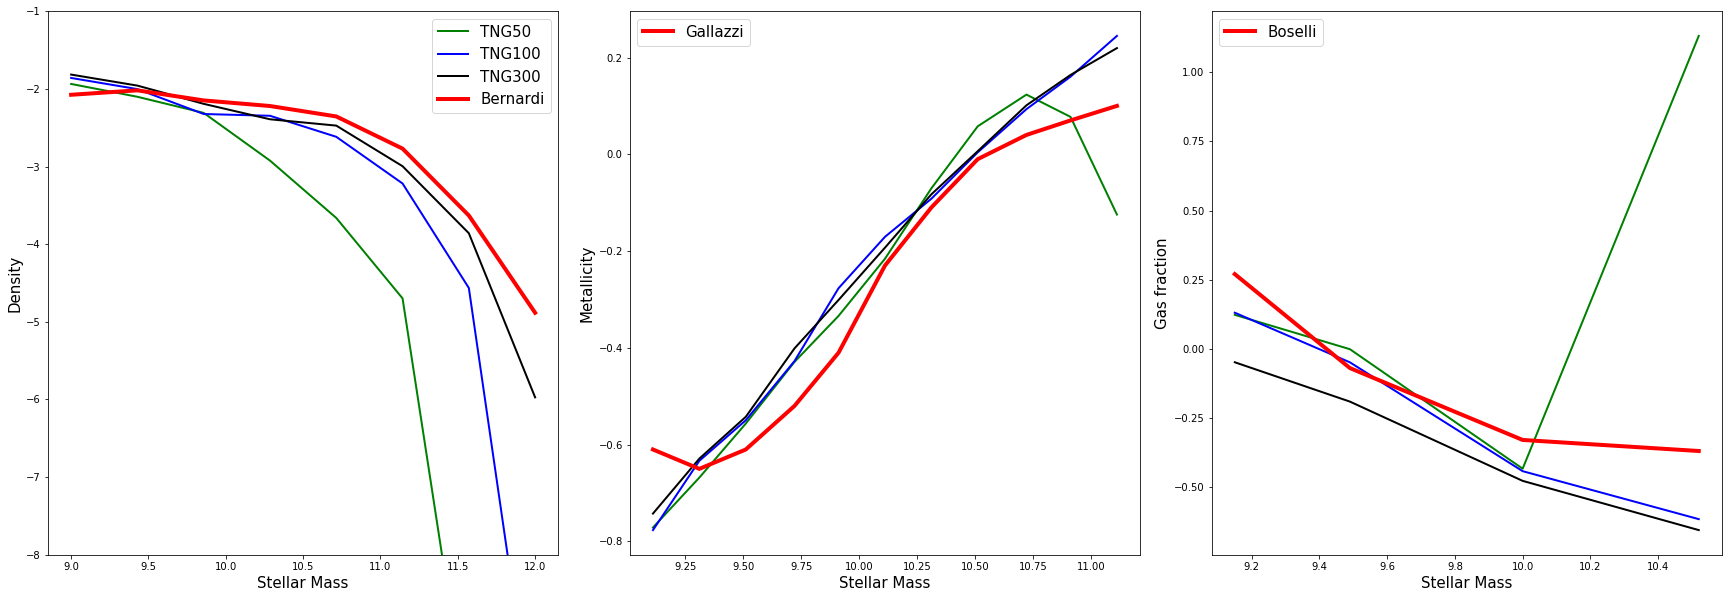

In [5]:
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
X, Y = 3,1
fig, axes = generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,10),
                                      hspace=0.02,wspace=0.14)
x = smf_obs[:,0]
smf = np.load(f'{sam_path}/test5/smf_TNG50.npy')
axes[0].plot(x,smf.T, c='g', alpha=1.,lw=2, label="TNG50")
smf = np.load(f'{sam_path}/test1/smf_TNG100.npy')
axes[0].plot(x,smf.T, c='b', alpha=1.,lw=2, label="TNG100")
smf = np.load(f'{sam_path}/test3_1/smf_TNG300.npy')
axes[0].plot(x,smf.T, c='k', alpha=1.,lw=2, label="TNG300")
axes[0].plot(x,np.log10(smf_obs[:,1]), c='r',label="Bernardi",lw=4)
axes[0].set_xlabel("Stellar Mass")
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].set_ylim(-8,-1)
x = smz_obs[:,0]
smz = np.load(f'{sam_path}/test5/smz_TNG50.npy')
axes[1].plot(x,smz.T, c='g', alpha=1,lw=2)
smz = np.load(f'{sam_path}/test1/smz_TNG100.npy')
axes[1].plot(x,smz.T, c='b', alpha=1,lw=2)
smz = np.load(f'{sam_path}/test3_1/smz_TNG300.npy')
axes[1].plot(x,smz.T, c='k', alpha=1,lw=2)
axes[1].plot(x,smz_obs[:,1], c='r',label="Gallazzi",lw=4)
axes[1].set_xlabel("Stellar Mass")
axes[1].set_ylabel("Metallicity")
axes[1].legend()
x = smfgas_obs[:,0]
smgas = np.load(f'{sam_path}/test5/smgas_TNG50.npy')
axes[2].plot(x,smgas.T, c='g', alpha=1.,lw=2)
smgas = np.load(f'{sam_path}/test1/smgas_TNG100.npy')
axes[2].plot(x,smgas.T, c='b', alpha=1.,lw=2)
smgas = np.load(f'{sam_path}/test3/smgas_TNG300.npy')
axes[2].plot(x,smgas.T, c='k', alpha=1.,lw=2)
axes[2].plot(x,smfgas_obs[:,1], c='r',label="Boselli",lw=4)
axes[2].legend()
axes[2].set_xlabel("Stellar Mass")
axes[2].set_ylabel("Gas fraction")
plt.savefig("fiducial.png",dpi=200,bbox_inches='tight')

## new version

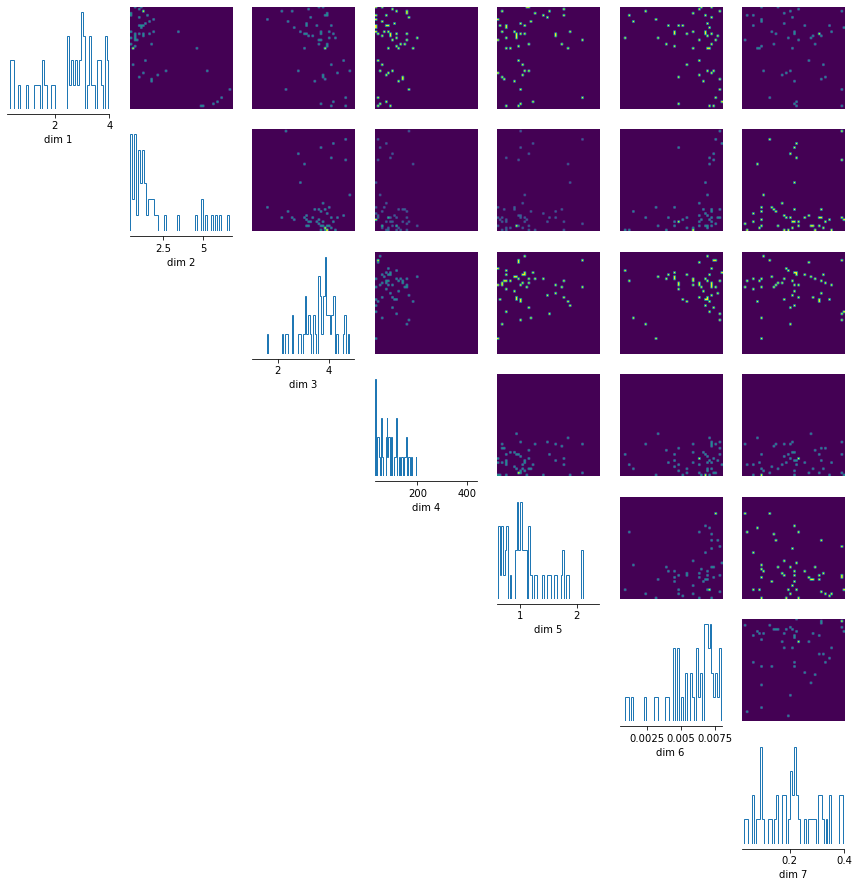

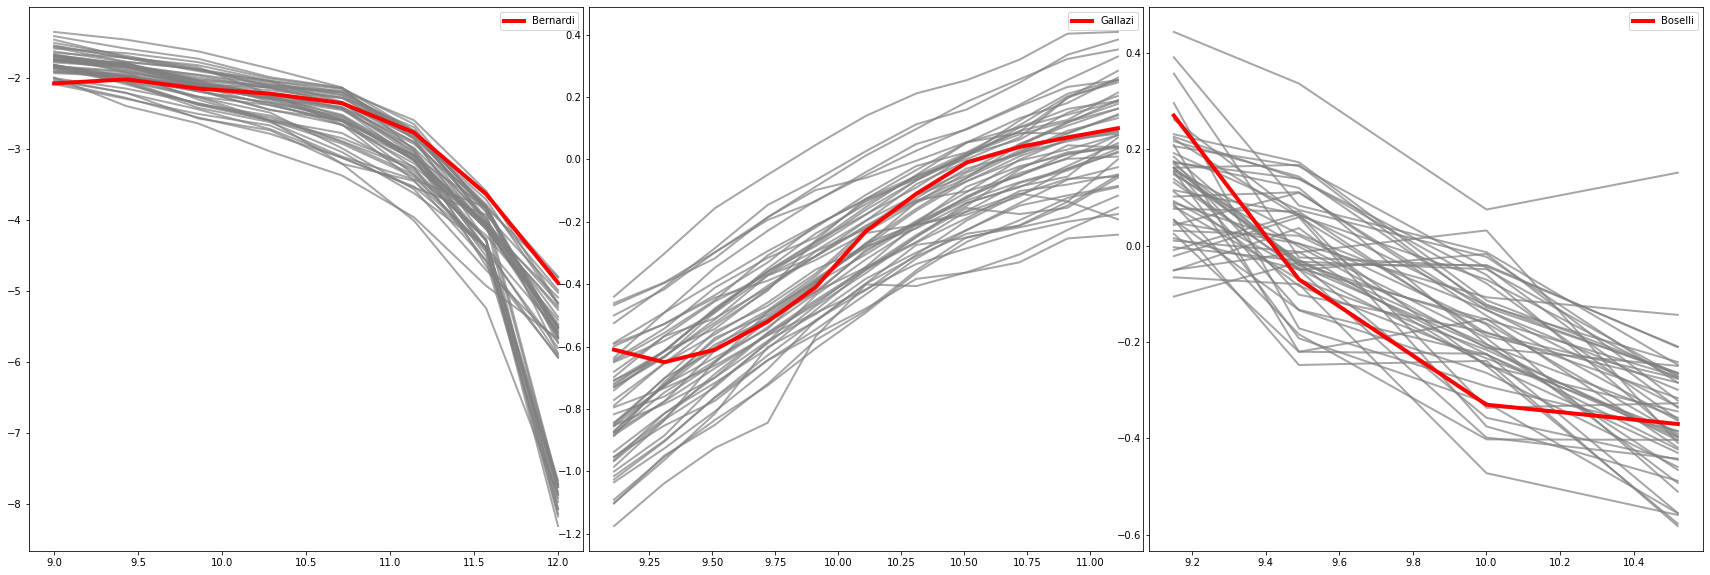

In [12]:
num = 7; fname = ''
plot(num,fname)

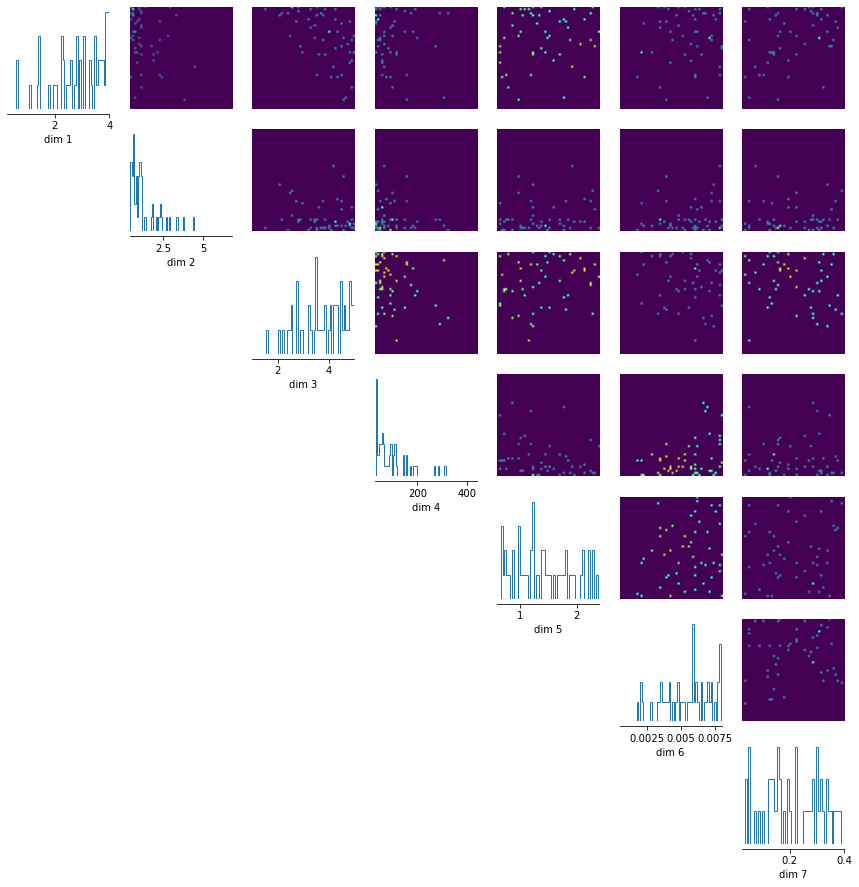

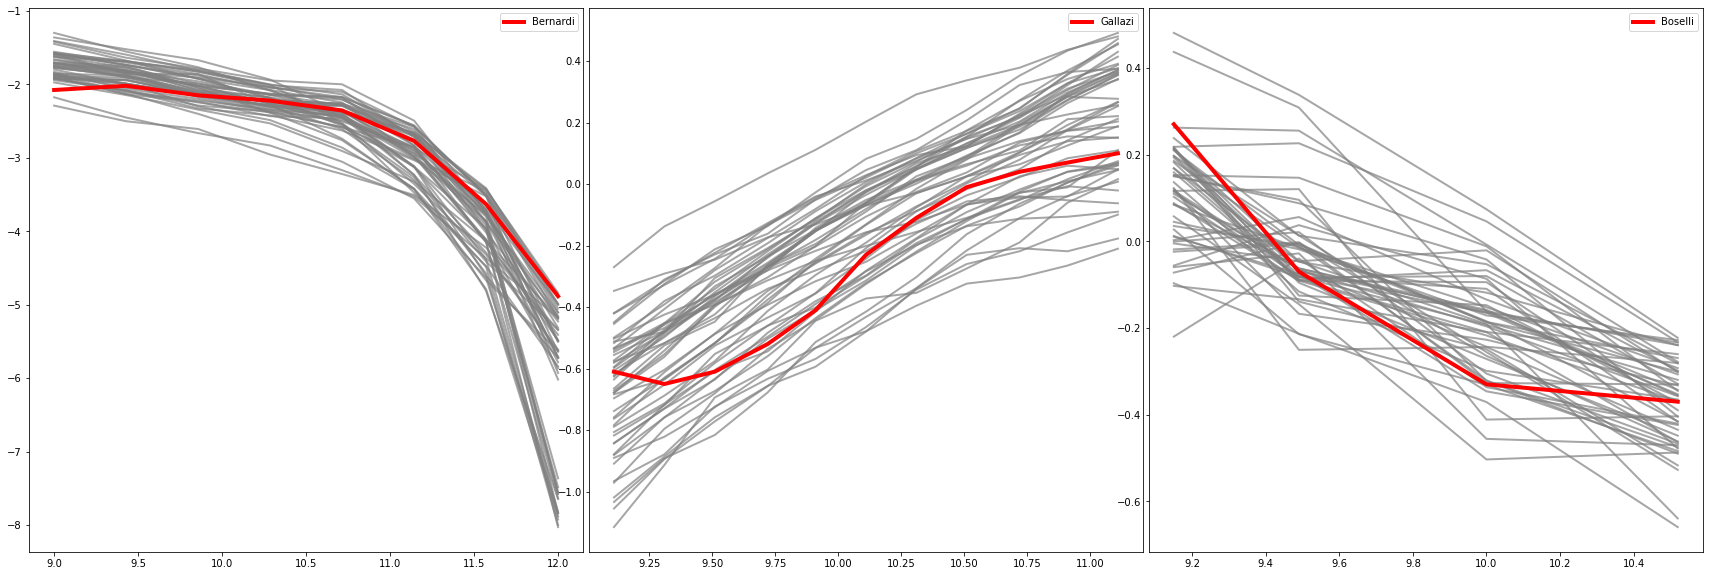

In [11]:
num = 9; fname = ''
plot(num,fname)

### Old

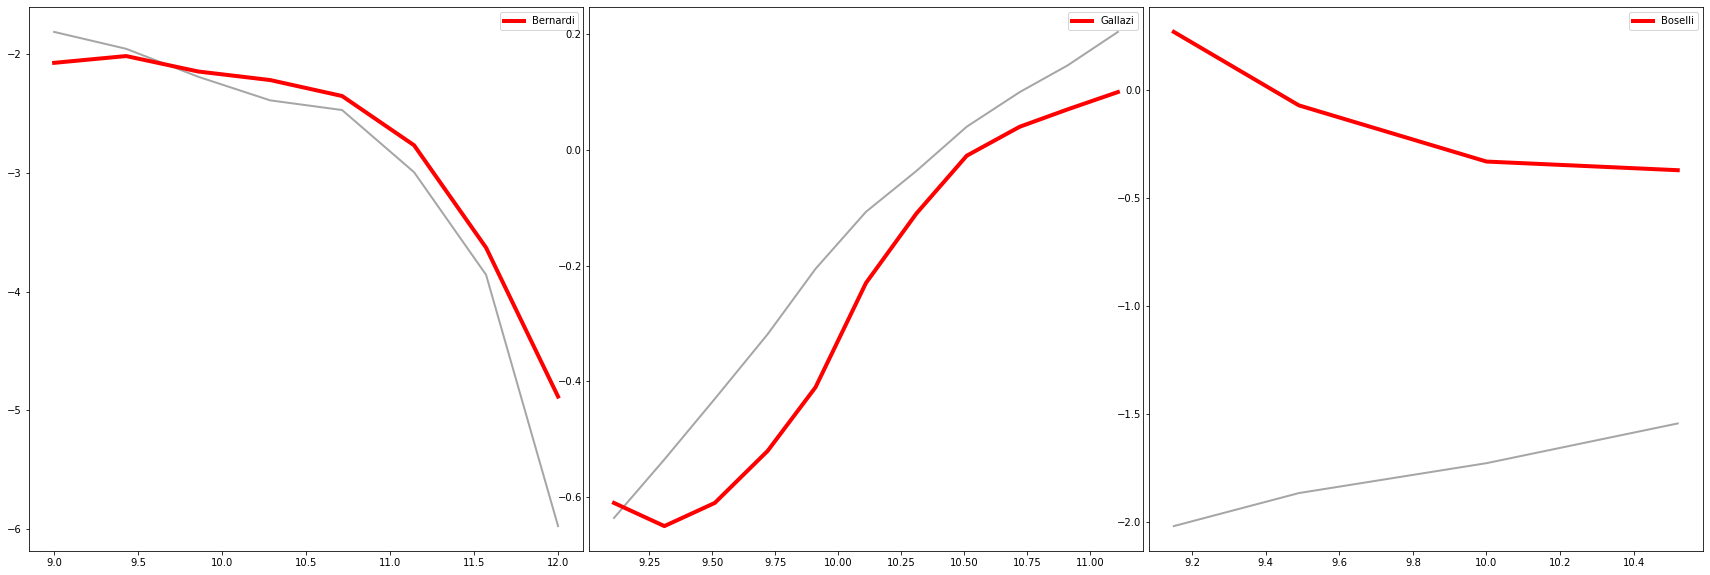

In [51]:
X, Y = 3,1
fig, axes = generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,10),
                                      hspace=0.02,wspace=0.01)
x = smf_obs[:,0]
smf = np.load(f'{sam_path}/test/smf.npy')
axes[0].plot(x,smf.T, c='gray', alpha=0.7,lw=2)
axes[0].plot(x,np.log10(smf_obs[:,1]), c='r',label="Bernardi",lw=4)
axes[0].legend()
x = smz_obs[:,0]
smz = np.load(f'{sam_path}/test/smz.npy')
axes[1].plot(x,smz.T, c='gray', alpha=0.7,lw=2)
axes[1].plot(x,smz_obs[:,1], c='r',label="Gallazi",lw=4)
axes[1].legend()
x = smfgas_obs[:,0]
smgas = np.load(f'{sam_path}/test/smgas.npy')
axes[2].plot(x,smgas.T, c='gray', alpha=0.7,lw=2)
axes[2].plot(x,smfgas_obs[:,1], c='r',label="Boselli",lw=4)
axes[2].legend()

## SMF_SMZ_2 (with uncertainty)

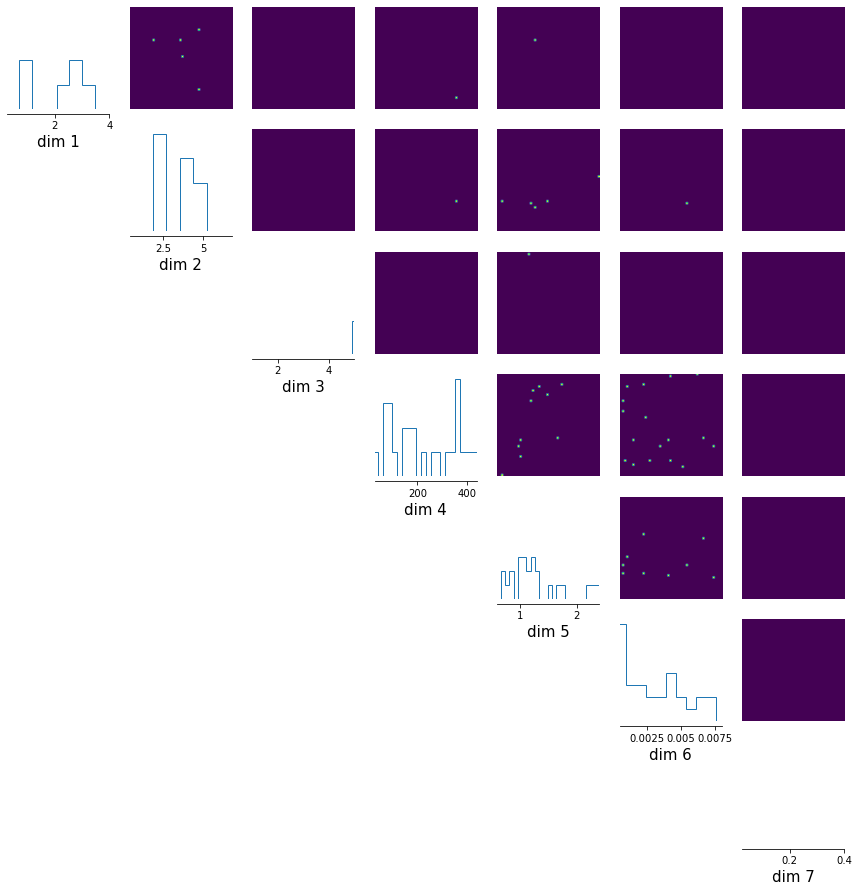

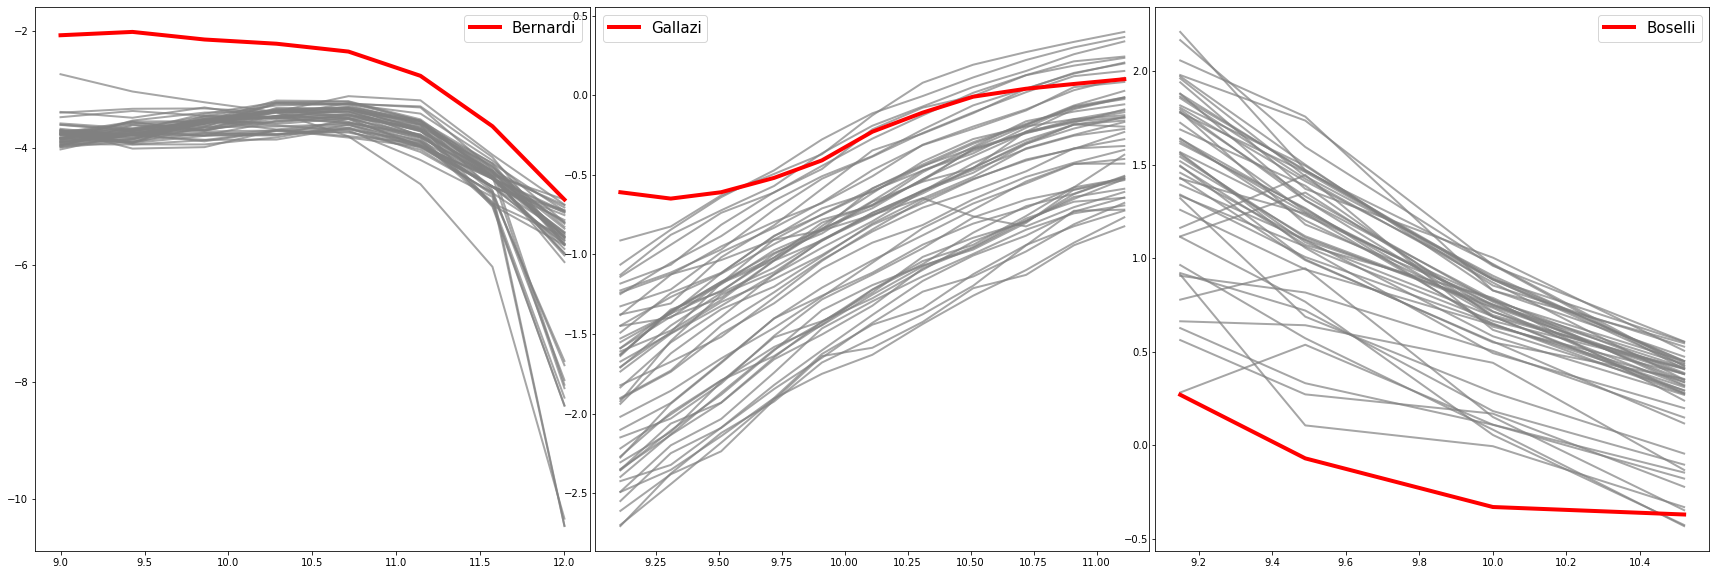

In [18]:
num = 3; fname = 'v2_sam_smf_smz_2'
plot(num,fname)

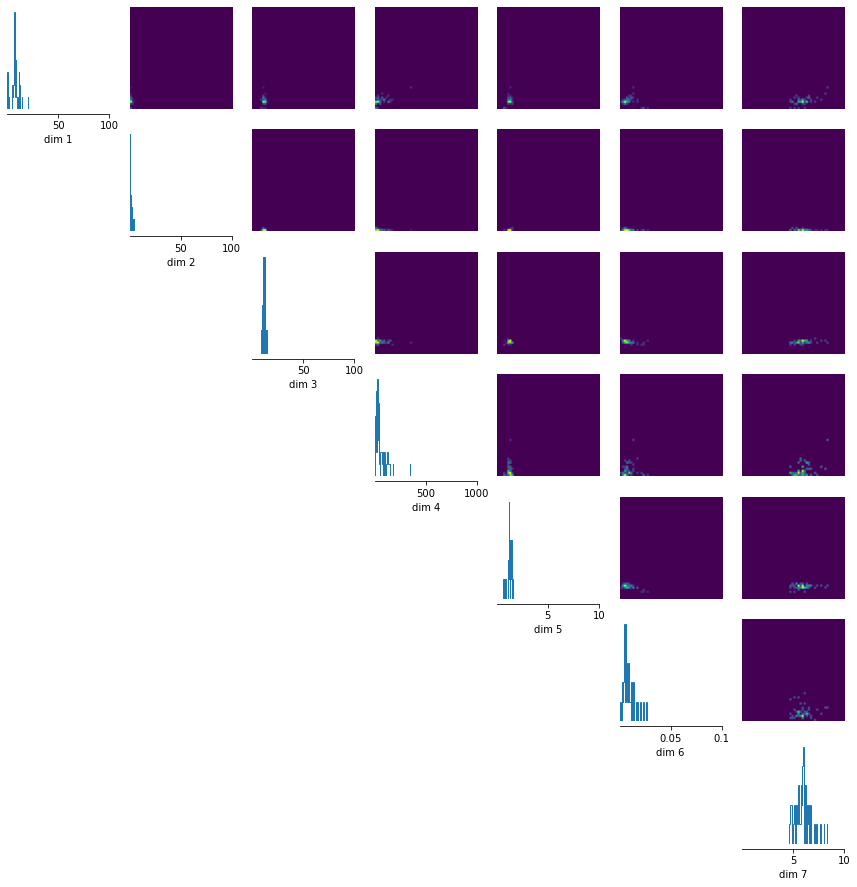

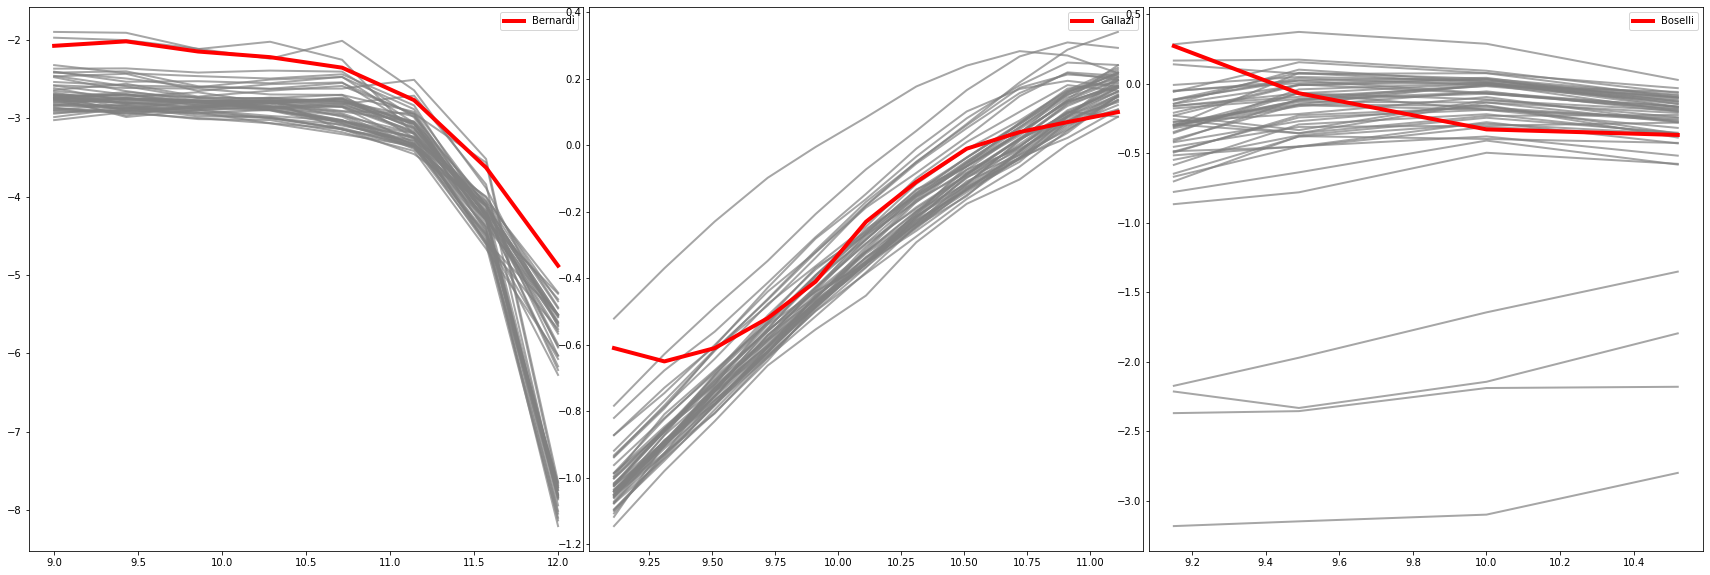

In [35]:
num = 40; fname = 'v2_sam_smf_smz_2'
plot(num,fname)

## SMF_SMZ

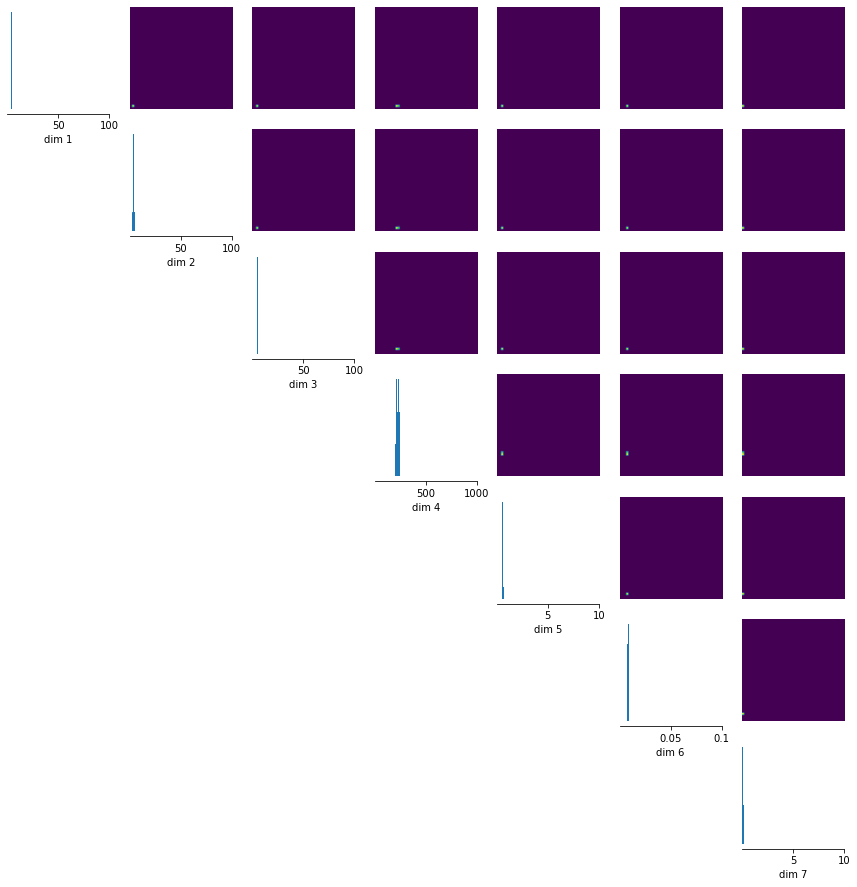

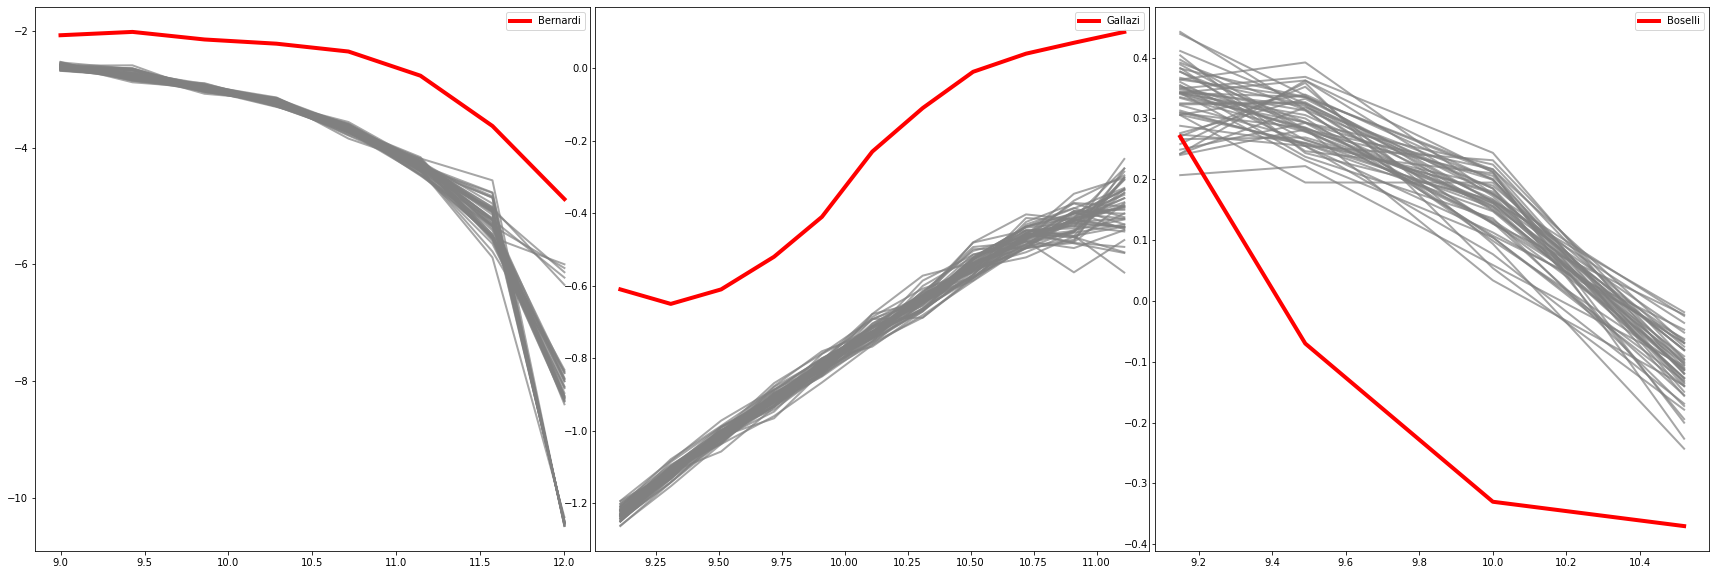

In [39]:
num = 18; fname = 'v2_sam_smf_smz'
plot(num,fname)

## SMZ

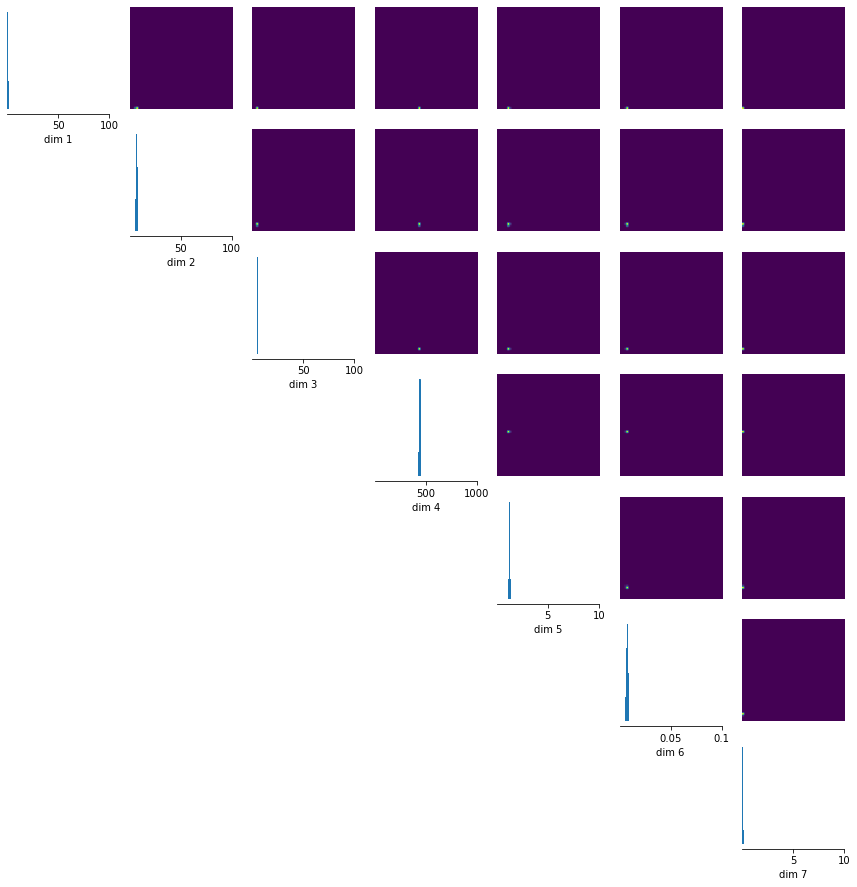

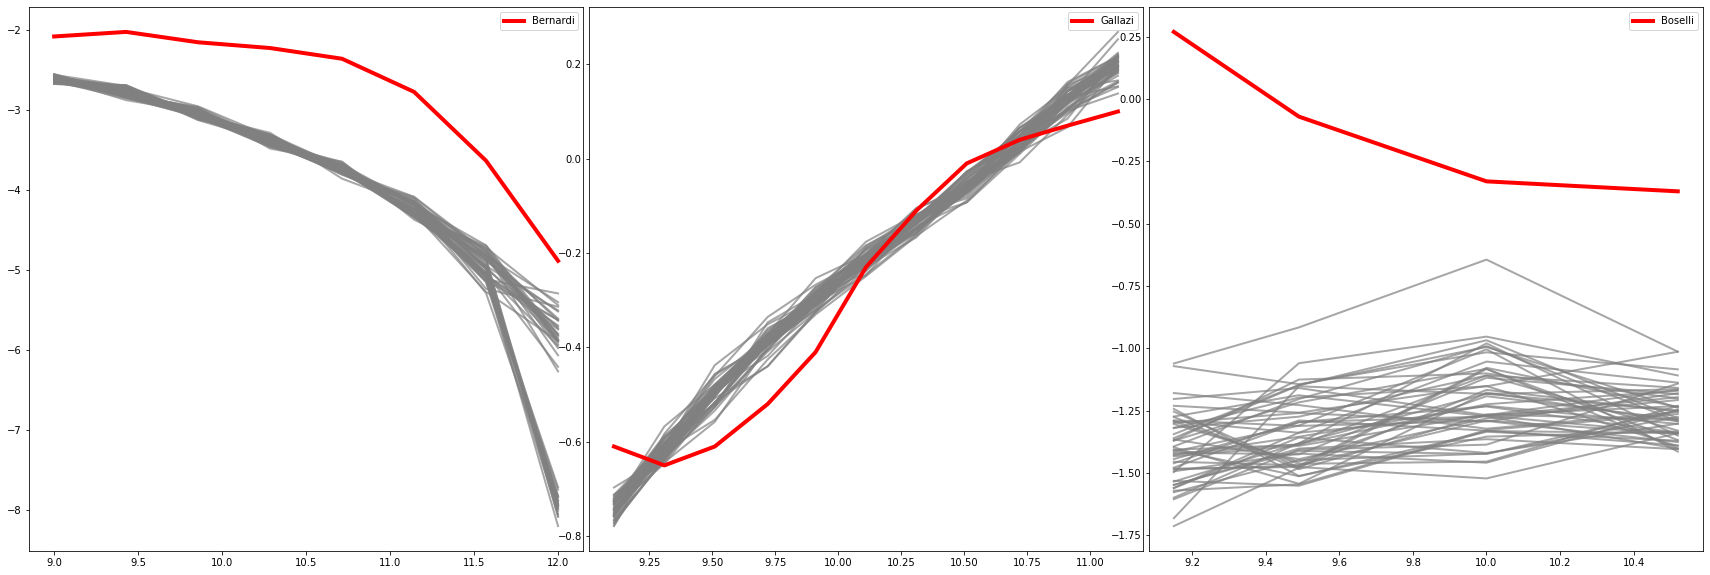

In [41]:
num = 30; fname = 'v2_sam_smz'
plot(num,fname)

## SMF

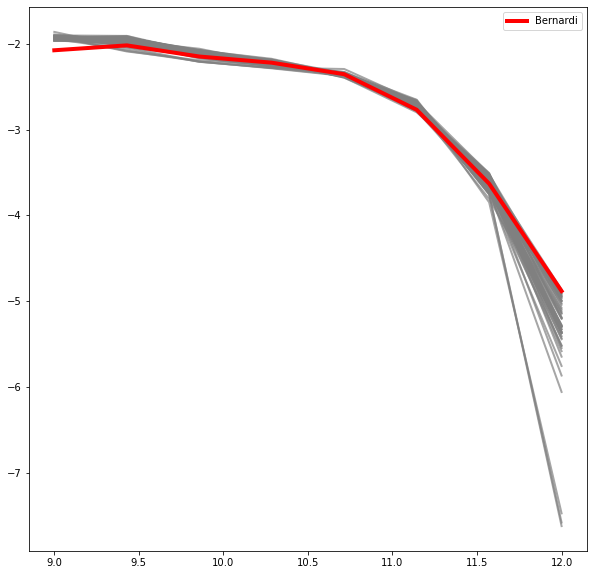

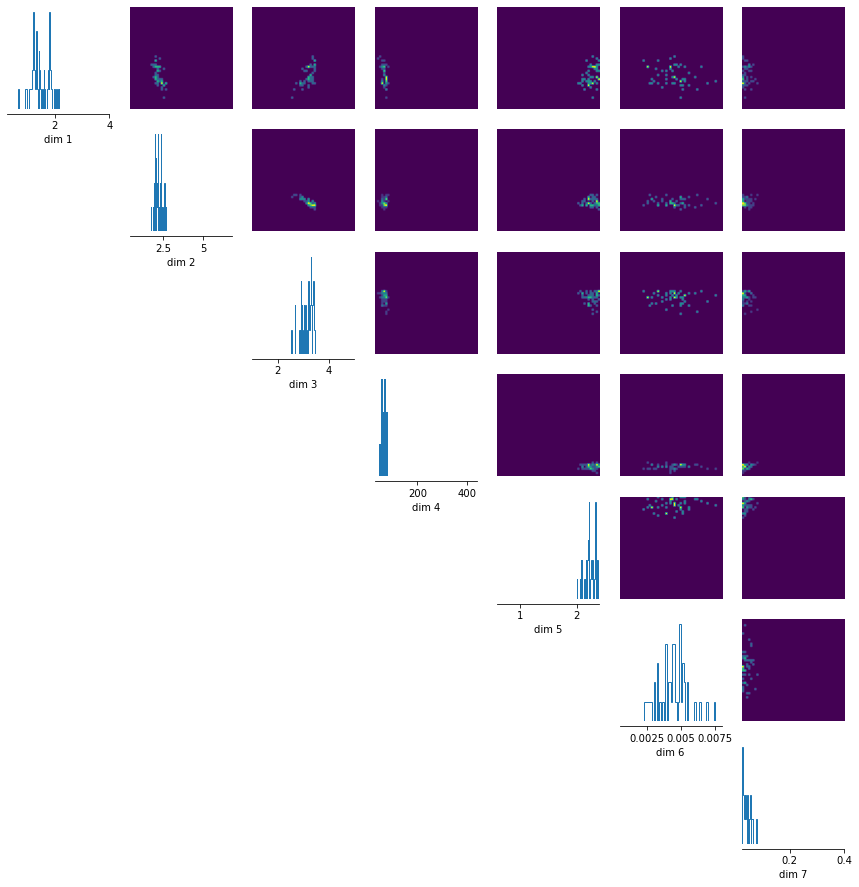

In [49]:
num = 27; fname = 'v2_sam_smf_bernardi'
#plot(num,fname)
fig = plt.figure(figsize=(10,10))
x = smf_obs[:,0]
smf = np.load(f'{sam_path}/result/{fname}/obs_{num}.npy')
plt.plot(x,smf.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,np.log10(smf_obs[:,1]), c='r',label="Bernardi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
plt.show()
num = 19
proposal = np.load(f"./data/{fname}/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(0.25,4.), (0.425,6.8), (1.,5.), (27.5,440), (0.6, 2.4), (5e-4, 0.008), (0.025,0.4)], figsize=(15, 15))

### The best values in Austen 1.0, 1.7, 3.0, 110, 0.1, 1.0, 1.2, 2e-3,

In [4]:
proposal.shape

(50, 7)

In [5]:
proposal[:,0].mean()

24.799511

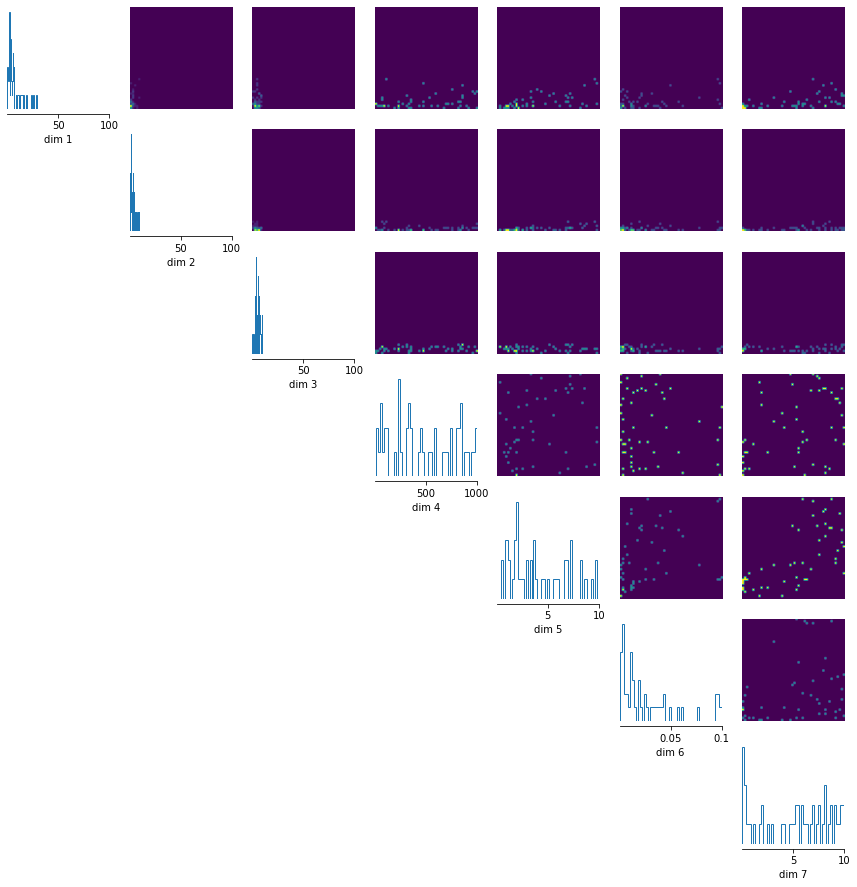

In [3]:
num = 25
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(1e-2,1e2), (1e-3,1e2), (1e-2,1e2), (1,1e3), (1e-1, 10), (1e-8, 0.1), (1e-4,10)], figsize=(15, 15))

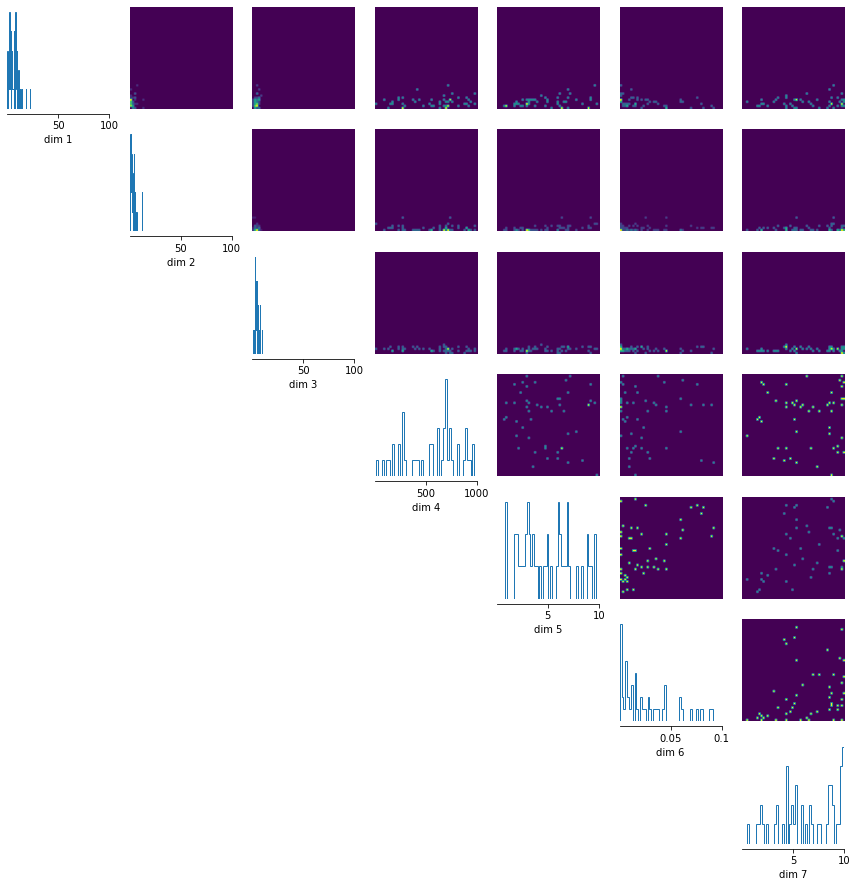

In [5]:
num = 26
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(1e-2,1e2), (1e-3,1e2), (1e-2,1e2), (1,1e3), (1e-1, 10), (1e-8, 0.1), (1e-4,10)], figsize=(15, 15))

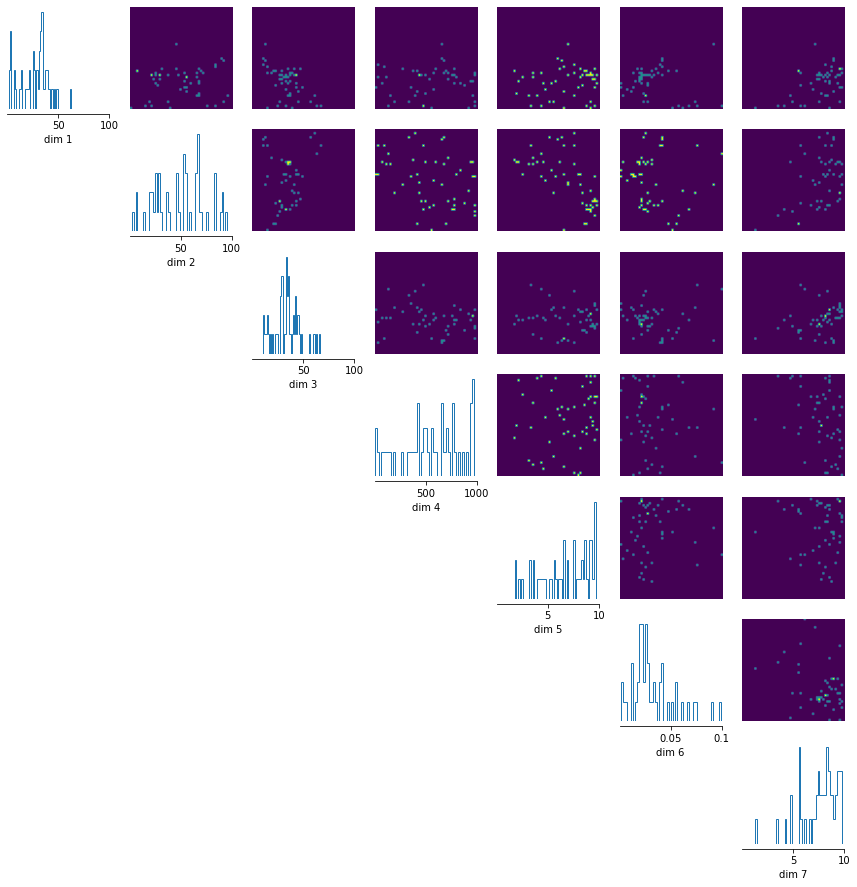

In [20]:
num = 3
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(1e-2,1e2), (1e-3,1e2), (1e-2,1e2), (1,1e3), (1e-1, 10), (1e-8, 0.1), (1e-4,10)], figsize=(15, 15))

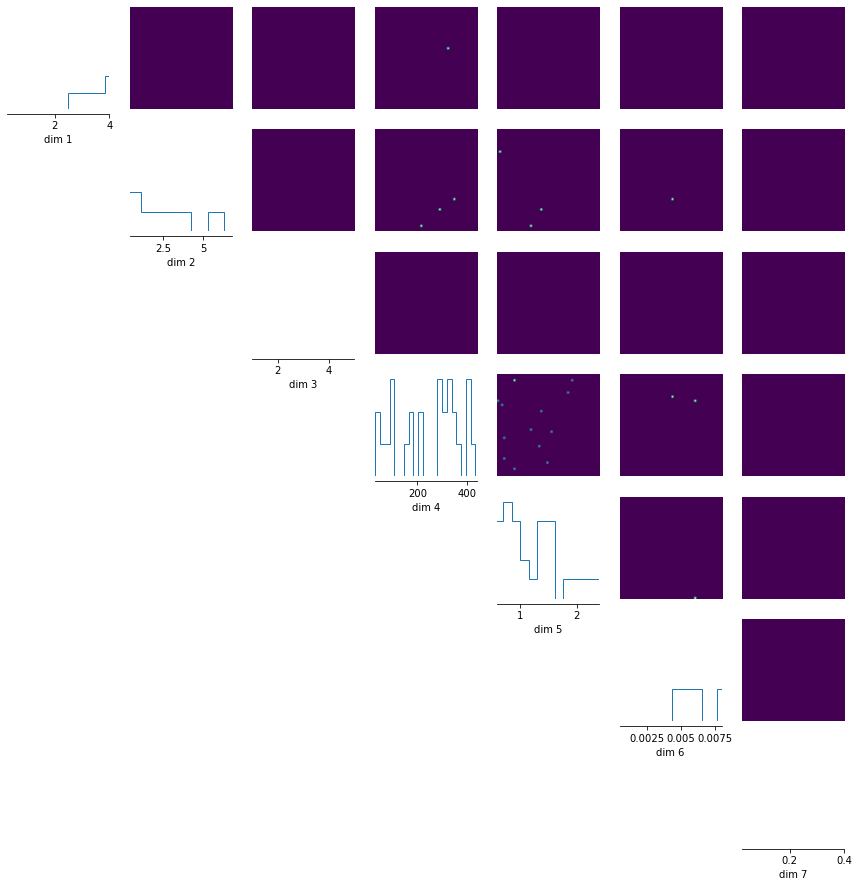

In [10]:
num = 1
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(0.25,4.), (0.425,6.8), (1.,5.), (27.5,440), (0.6, 2.4), (5e-4, 0.008), (0.025,0.4)], figsize=(15, 15))

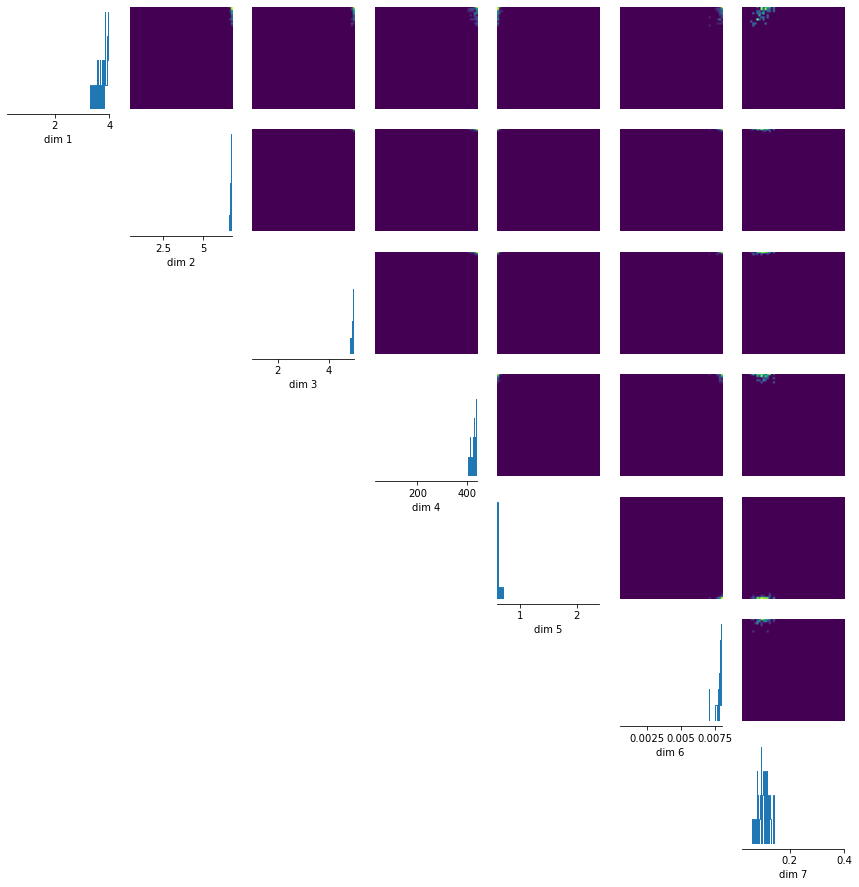

In [3]:
num = 1
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(0.25,4.), (0.425,6.8), (1.,5.), (27.5,440), (0.6, 2.4), (5e-4, 0.008), (0.025,0.4)], figsize=(15, 15))

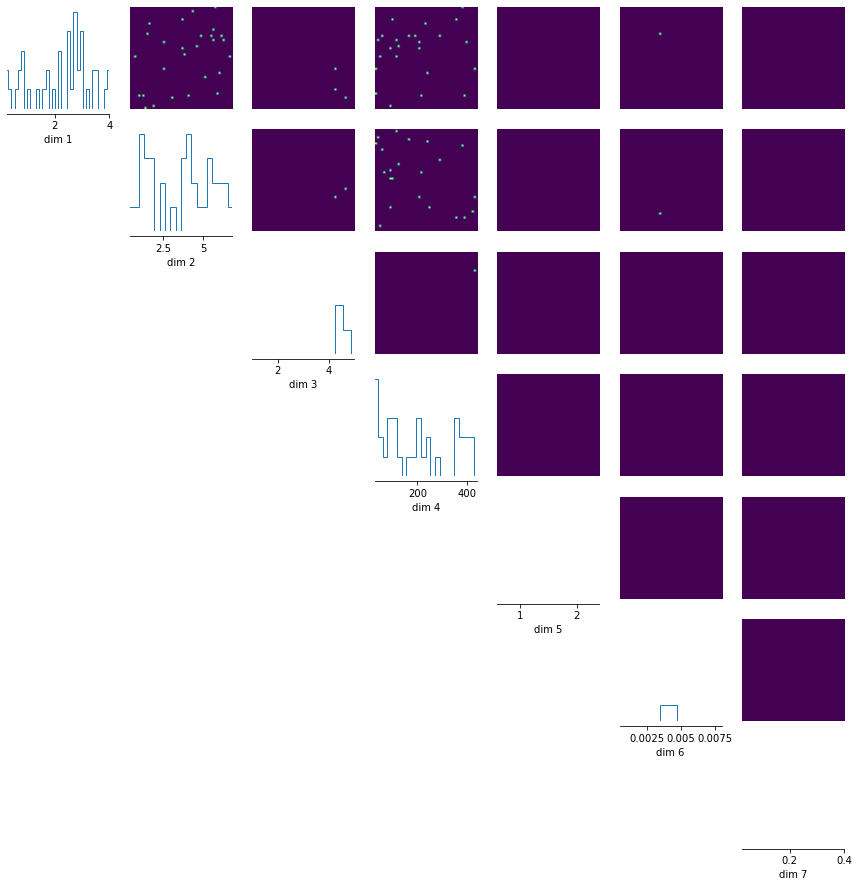

In [8]:
num = 7
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(0.25,4.), (0.425,6.8), (1.,5.), (27.5,440), (0.6, 2.4), (5e-4, 0.008), (0.025,0.4)], figsize=(15, 15))

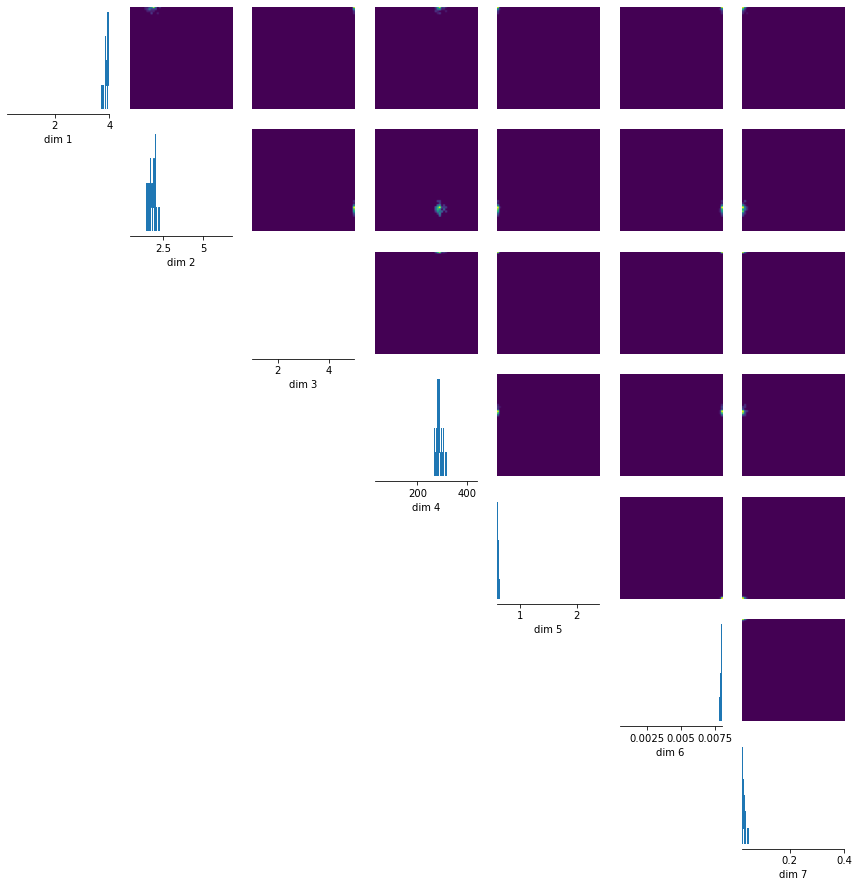

In [39]:
num = 19
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(0.25,4.), (0.425,6.8), (1.,5.), (27.5,440), (0.6, 2.4), (5e-4, 0.008), (0.025,0.4)], figsize=(15, 15))

IndexError: index 2 is out of bounds for dimension 0 with size 2

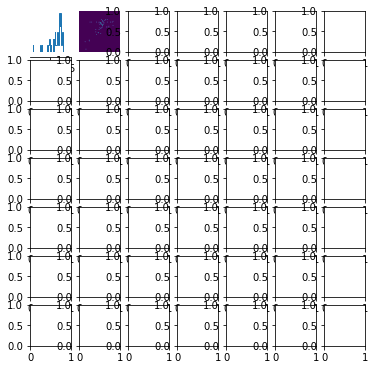

In [11]:
num = 2
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[[0.1, 5], [0.1, 5]], labels=["alpha","tau"], figsize=(6, 6))
plt.savefig("plot/posterior_bernardi13.png",bbox_inches="tight", dpi=200)

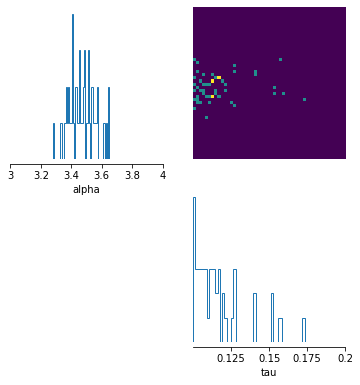

In [38]:
num = 5
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[[3, 4], [0.1, 0.2]], labels=["alpha","tau"], figsize=(6, 6))
plt.savefig("plot/zoom_posterior_bernardi13.png",bbox_inches="tight", dpi=200)

In [5]:
observation = np.load('{}/result/target.npy'.format(sam_path))
print(observation)
observation = np.load('observation/bernardi13_intp.npy')
print(observation)

[-1.6076971  -1.25913052 -1.00485298 -1.16095672 -1.20210091 -1.41747011
 -1.57433973 -1.89178964 -2.03523804 -2.17551988 -2.38215447 -2.59590632
 -2.89021949 -3.54930009 -8.09163537]
[[9.00000000e+00 8.38982239e-03]
 [9.42857143e+00 9.56694727e-03]
 [9.85714286e+00 7.09604339e-03]
 [1.02857143e+01 6.01206803e-03]
 [1.07142857e+01 4.41364177e-03]
 [1.11428571e+01 1.70012047e-03]
 [1.15714286e+01 2.33924158e-04]
 [1.20000000e+01 1.30858311e-05]]


## SMZ

In [4]:
smz_obs    = np.load('observation/smz.npy')

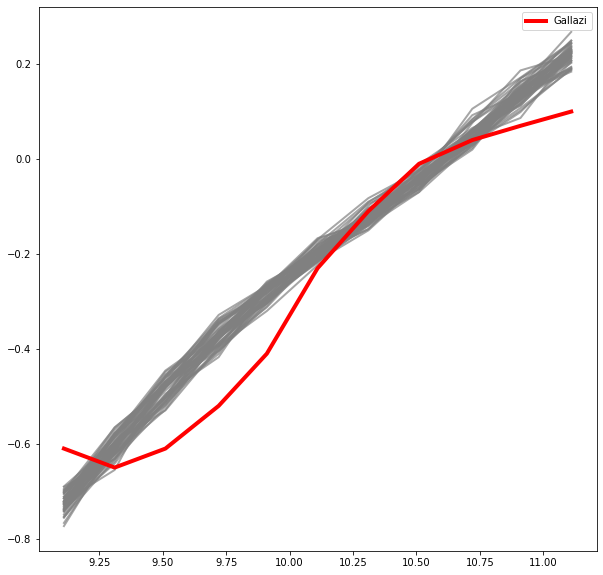

In [5]:
fig = plt.figure(figsize=(10,10))
num = 28
x = smz_obs[:,0]
smz = np.load(f'{sam_path}/result/smz_{num}.npy')
plt.plot(x,smz.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,smz_obs[:,1], c='r',label="Gallazi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

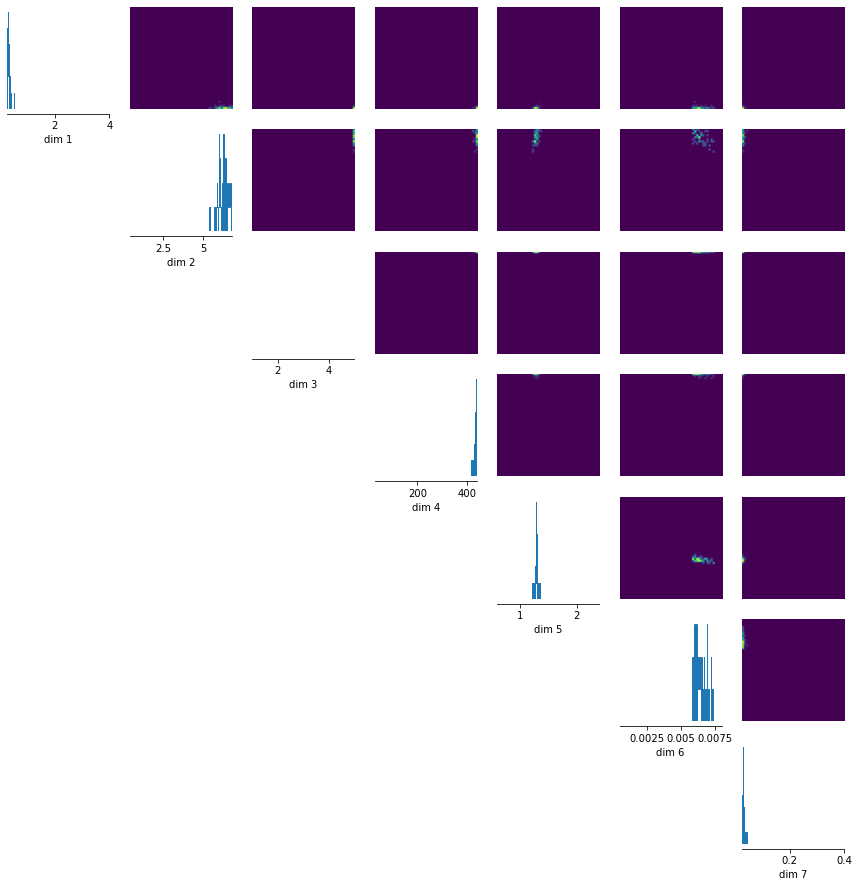

In [6]:
num = 28
proposal = np.load(f"./data/params_{num}.npy")
_ = analysis.pairplot(proposal, limits=[(0.25,4.), (0.425,6.8), (1.,5.), (27.5,440), (0.6, 2.4), (5e-4, 0.008), (0.025,0.4)], figsize=(15, 15))

## SMF + SMZ

In [6]:
smf_obs    = np.load('observation/bernardi13_intp.npy')
smz_obs    = np.load('observation/smz.npy')
smfgas_obs = np.load('observation/smfgas.npy')

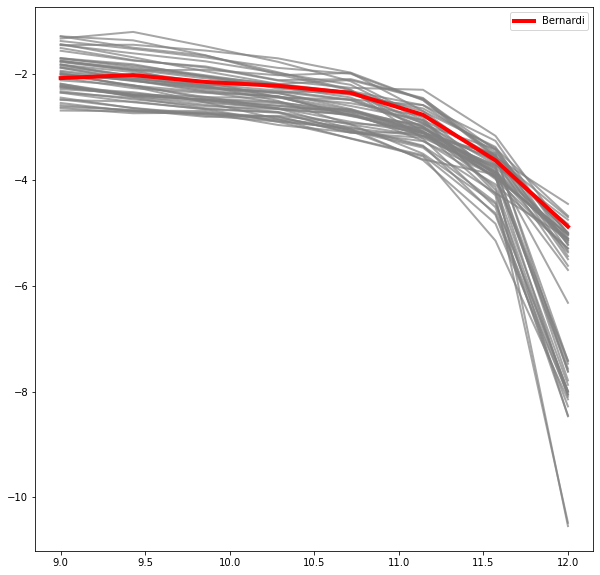

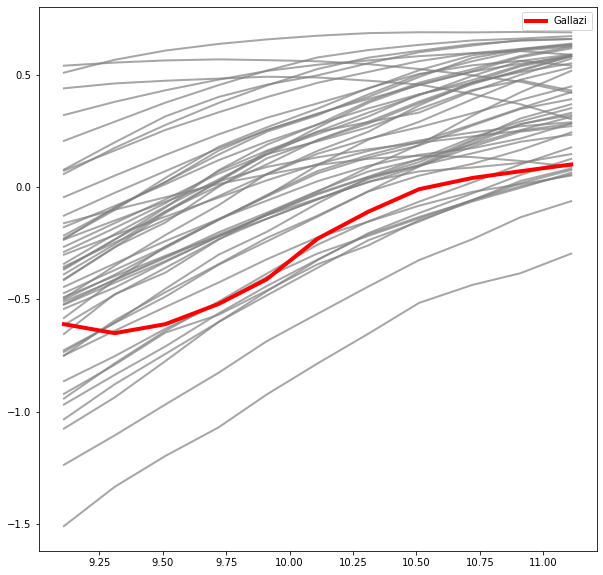

In [7]:
fig = plt.figure(figsize=(10,10))
num = 25
x = smf_obs[:,0]
smf = np.load(f'{sam_path}/result/smf_{num}_org.npy')
plt.plot(x,smf.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,np.log10(smf_obs[:,1]), c='r',label="Bernardi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
plt.show()
fig = plt.figure(figsize=(10,10))
x = smz_obs[:,0]
smz = np.load(f'{sam_path}/result/smz_{num}_org.npy')
plt.plot(x,smz.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,smz_obs[:,1], c='r',label="Gallazi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

In [ ]:
a

In [4]:
smf_obs    = np.load('observation/bernardi13_intp.npy')
smz_obs    = np.load('observation/smz.npy')
smfgas_obs = np.load('observation/smfgas.npy')

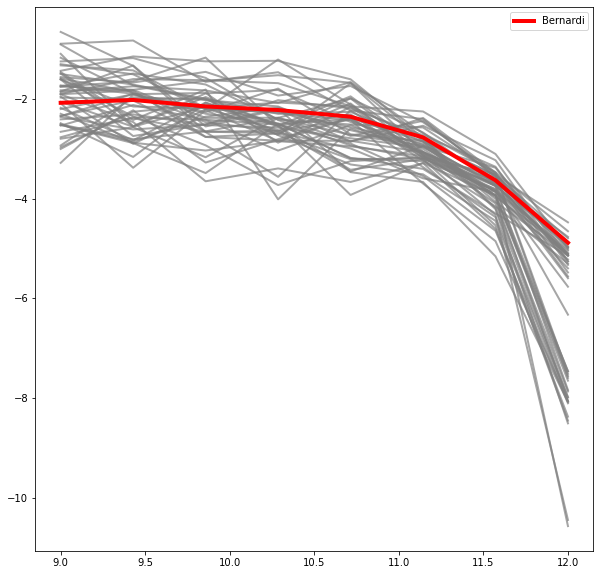

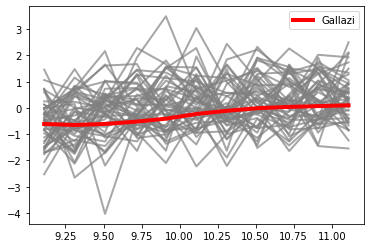

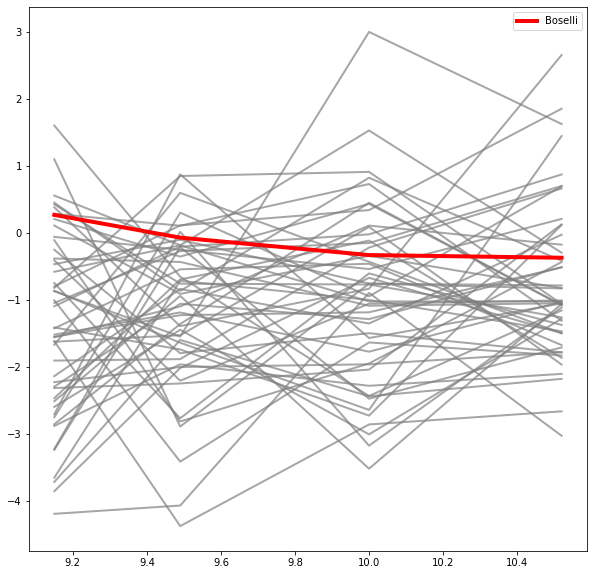

In [5]:
fig = plt.figure(figsize=(10,10))
num = 25
x = smf_obs[:,0]
smf = np.load(f'{sam_path}/result/smf_{num}.npy')
plt.plot(x,smf.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,np.log10(smf_obs[:,1]), c='r',label="Bernardi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
plt.show()
x = smz_obs[:,0]
smz = np.load(f'{sam_path}/result/smz_{num}.npy')
plt.plot(x,smz.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,smz_obs[:,1], c='r',label="Gallazi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)
fig = plt.figure(figsize=(10,10))
x = smfgas_obs[:,0]
smgas = np.load(f'{sam_path}/result/smgas_{num}.npy')
plt.plot(x,smgas.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,smfgas_obs[:,1], c='r',label="Boselli",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

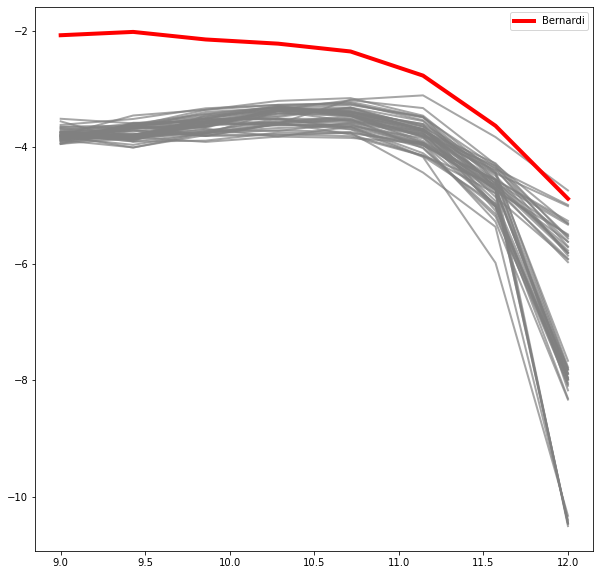

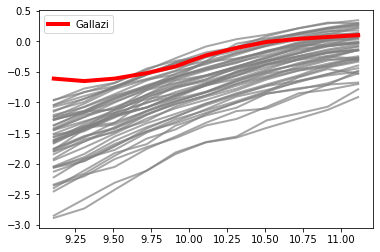

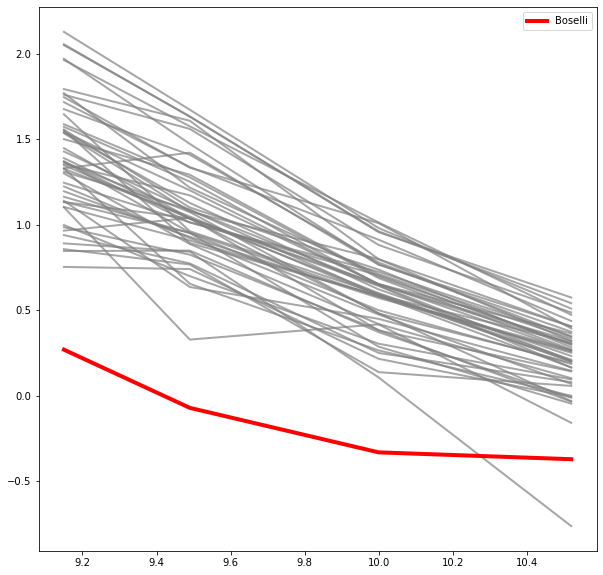

In [16]:
fig = plt.figure(figsize=(10,10))
num = 2
x = smf_obs[:,0]
smf = np.load(f'{sam_path}/result/smf_{num}.npy')
plt.plot(x,smf.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,np.log10(smf_obs[:,1]), c='r',label="Bernardi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
plt.show()
x = smz_obs[:,0]
smz = np.load(f'{sam_path}/result/smz_{num}.npy')
plt.plot(x,smz.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,smz_obs[:,1], c='r',label="Gallazi",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)
fig = plt.figure(figsize=(10,10))
x = smfgas_obs[:,0]
smgas = np.load(f'{sam_path}/result/smgas_{num}.npy')
plt.plot(x,smgas.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,smfgas_obs[:,1], c='r',label="Boselli",lw=4)
#plt.yscale("log")
#plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

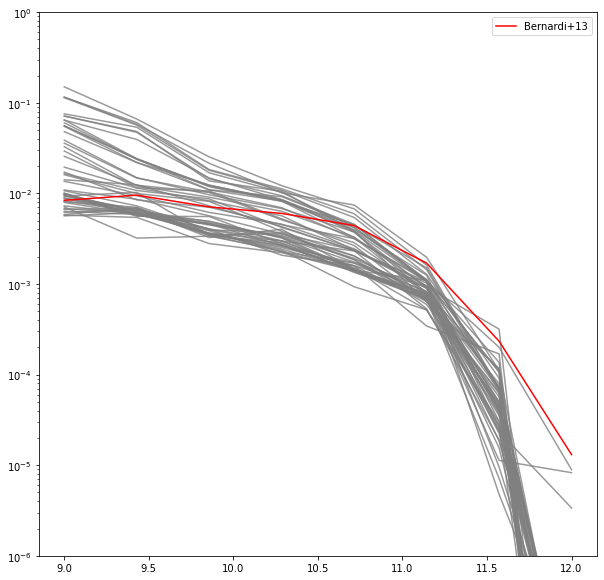

In [40]:
fig = plt.figure(figsize=(10,10))
num = 0
x = observation[:,0]
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(x,np.power(10,smf.T), c='gray', alpha=0.8)
plt.plot(x,observation[:,1], c='r',label="Bernardi+13")
plt.yscale("log")
plt.ylim(1e-6,1e0)
plt.legend()
plt.savefig("plot/smf_uniform.png",bbox_inches="tight", dpi=200)

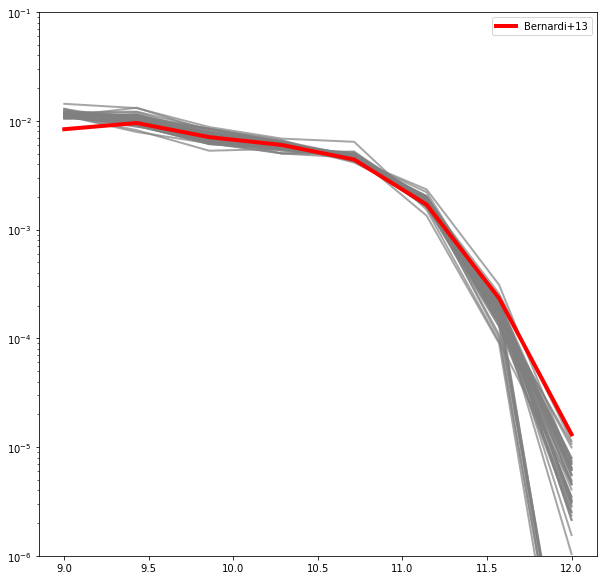

In [6]:
fig = plt.figure(figsize=(10,10))
num = 28
x = observation[:,0]
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(x,np.power(10,smf.T), c='gray', alpha=0.7,lw=2)
plt.plot(x,observation[:,1], c='r',label="Bernardi+13",lw=4)
plt.yscale("log")
plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

In [ ]:
fig = plt.figure(figsize=(10,10))
num = 11
x = observation[:,0]
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(x,np.power(10,smf.T), c='gray', alpha=0.7,lw=2)
plt.plot(x,observation[:,1], c='r',label="Bernardi+13",lw=4)
plt.yscale("log")
plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

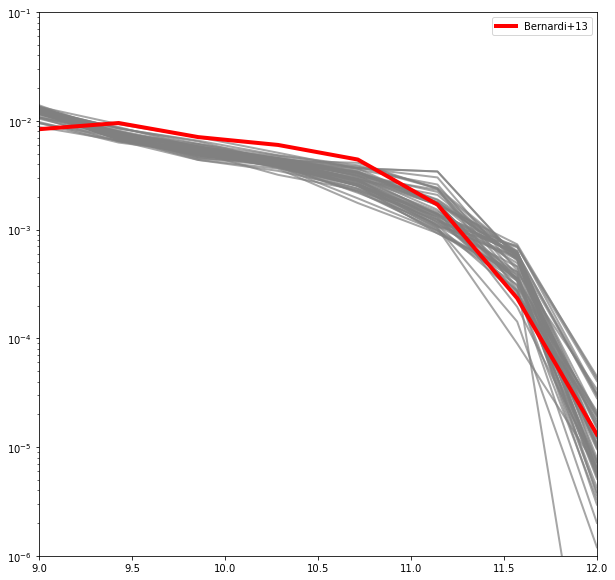

In [10]:
fig = plt.figure(figsize=(10,10))
num = 4
x = observation[:,0]
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(x,np.power(10,smf.T), c='gray', alpha=0.7,lw=2)
plt.plot(x,observation[:,1], c='r',label="Bernardi+13",lw=4)
plt.yscale("log")
plt.ylim(1e-6,1e-1)
plt.xlim(9,12)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

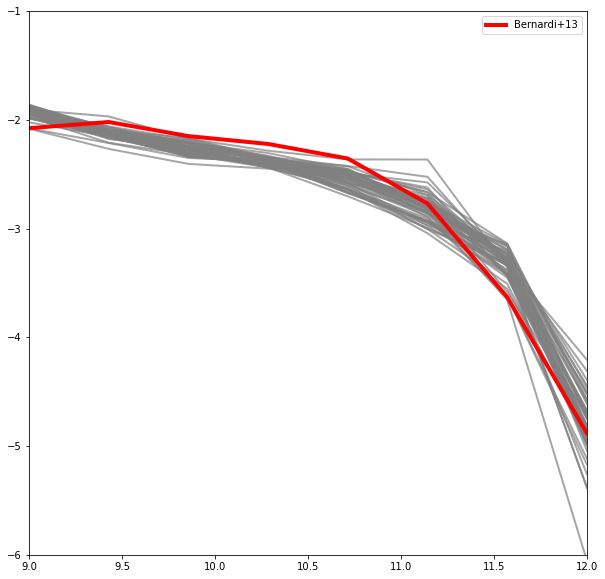

In [12]:
fig = plt.figure(figsize=(10,10))
num = 5
x = observation[:,0]
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(x,smf.T, c='gray', alpha=0.7,lw=2)
plt.plot(x,np.log10(observation[:,1]), c='r',label="Bernardi+13",lw=4)
plt.ylim(-6,-1)
plt.xlim(9,12)
plt.legend()
plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

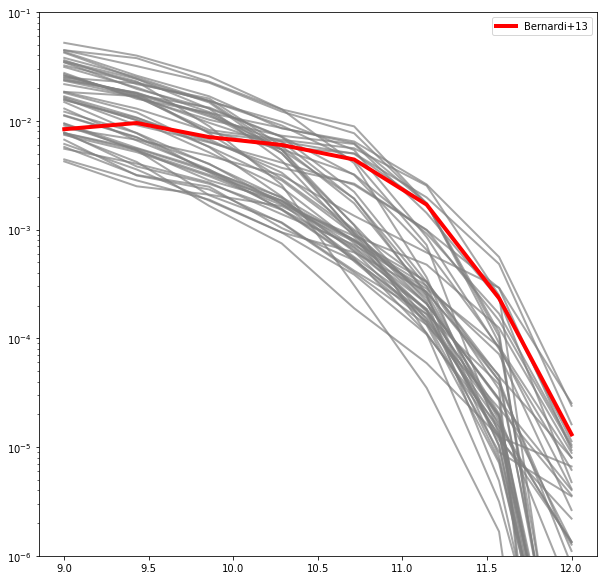

In [5]:
fig = plt.figure(figsize=(10,10))
num = 0
x = observation[:,0]
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(x,np.power(10,smf.T), c='gray', alpha=0.7,lw=2)
plt.plot(x,observation[:,1], c='r',label="Bernardi+13",lw=4)
plt.yscale("log")
plt.ylim(1e-6,1e-1)
plt.legend()
#plt.savefig("plot/ili_bernardi13.png",bbox_inches="tight", dpi=200)

In [ ]:
num = 5
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(np.arange(8),smf.T, c='gray', alpha=0.8)
plt.plot(np.arange(8),np.log10(observation[:,1]), c='r')

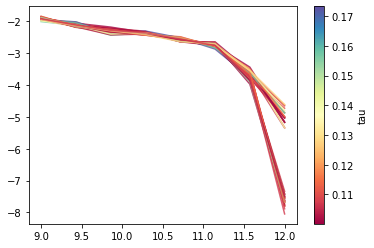

In [28]:
num = 5
proposal = np.load(f"./data/params_{num}.npy")
values = proposal[:,1]
# Create a ScalarMappable object with a colormap
cmap = plt.cm.get_cmap('Spectral')  # Choose a colormap, e.g., 'viridis'
norm = plt.Normalize(values.min(), values.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to use the colormap

smf = np.load(f'{sam_path}/result/obs_{num}.npy')
for i in range(smf.shape[0]):
    plt.plot(x,smf[i], c=sm.to_rgba(values)[i], alpha=0.8)
cbar = plt.colorbar(sm)
cbar.set_label('tau')
#plt.plot(np.arange(15),observation, c='g', ls=':')
plt.savefig("plot/tau_variation.png",bbox_inches="tight", dpi=200)

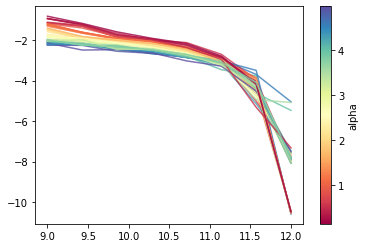

In [47]:
num = 0
proposal = np.load(f"./data/params_{num}.npy")
values = proposal[:,1]
# Create a ScalarMappable object with a colormap
cmap = plt.cm.get_cmap('Spectral')  # Choose a colormap, e.g., 'viridis'
norm = plt.Normalize(values.min(), values.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to use the colormap

smf = np.load(f'{sam_path}/result/obs_{num}.npy')
for i in range(smf.shape[0]):
    plt.plot(x,smf[i], c=sm.to_rgba(values)[i], alpha=0.8)
cbar = plt.colorbar(sm)
cbar.set_label('tau')
#plt.plot(np.arange(15),observation, c='g', ls=':')
plt.savefig("plot/tau_variation_uniform.png",bbox_inches="tight", dpi=200)
plt.close()
proposal = np.load(f"./data/params_{num}.npy")
values = proposal[:,0]
# Create a ScalarMappable object with a colormap
cmap = plt.cm.get_cmap('Spectral')  # Choose a colormap, e.g., 'viridis'
norm = plt.Normalize(values.min(), values.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to use the colormap

smf = np.load(f'{sam_path}/result/obs_{num}.npy')
for i in range(smf.shape[0]):
    plt.plot(x,smf[i], c=sm.to_rgba(values)[i], alpha=0.8)
cbar = plt.colorbar(sm)
cbar.set_label('alpha')
#plt.plot(np.arange(15),observation, c='g', ls=':')
plt.savefig("plot/alpha_variation_uniform.png",bbox_inches="tight", dpi=200)

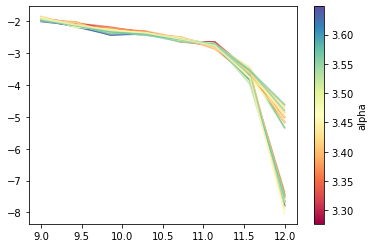

In [29]:
num = 5
proposal = np.load(f"./data/params_{num}.npy")
values = proposal[:,0]
# Create a ScalarMappable object with a colormap
cmap = plt.cm.get_cmap('Spectral')  # Choose a colormap, e.g., 'viridis'
norm = plt.Normalize(values.min(), values.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to use the colormap

smf = np.load(f'{sam_path}/result/obs_{num}.npy')
for i in range(smf.shape[0]):
    plt.plot(x,smf[i], c=sm.to_rgba(values)[i], alpha=0.8)
cbar = plt.colorbar(sm)
cbar.set_label('alpha')
#plt.plot(np.arange(15),observation, c='g', ls=':')
plt.savefig("plot/alpha_variation.png",bbox_inches="tight", dpi=200)

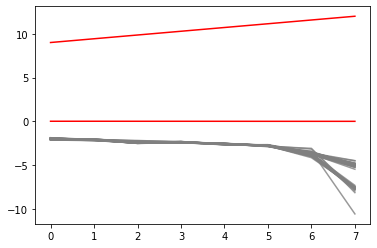

In [8]:
num = 2
smf = np.load(f'{sam_path}/result/obs_{num}.npy')
plt.plot(np.arange(8),smf.T, c='gray', alpha=0.8)
plt.plot(np.arange(8),observation, c='r')

## Posterior

In [70]:
smf_obs = np.load('observation/bernardi13_intp.npy')
smz_obs = np.load('observation/smz.npy')
obs     = np.append(np.log10(smf_obs[:,1]), smz_obs[:,1])

In [55]:
fpath   = '/mnt/home/yjo10/ceph/ILI/SAM/data'
f = open("{}/ILI.pkl".format(fpath), 'rb')
ILI = pickle.load(f)

In [80]:
n_round = 18
theta = np.load('{}/params_{}.npy'.format(fpath,n_round))
x     = np.load('{}/result/smf_{}.npy'.format(sam_path,n_round))
x     = np.c_[x, np.load('{}/result/smz_{}.npy'.format(sam_path,n_round))]
theta = torch.tensor(theta, dtype=torch.float).to(device)
x     = torch.tensor(x, dtype=torch.float).to(device)

In [81]:
sample_with = 'mcmc'
mcmc_method = 'hmc'
batch_size  = 10
nde       = ILI.append_simulations(theta, x).train(training_batch_size=batch_size)
posterior = ILI.build_posterior(nde, sample_with=sample_with, mcmc_method=mcmc_method)

 Training neural network. Epochs trained: 7

KeyboardInterrupt: 

In [84]:
nde       = ILI.append_simulations(theta, x)

In [88]:
post1 = nde.get_posterior()

In [68]:
post = ILI.get_posterior()

In [71]:
post.set_default_x(obs)

MCMCPosterior sampler for potential_fn=<LikelihoodBasedPotential>

In [90]:
sample = post1.sample((50,))

Sample: 100%|██████████| 511/511 [03:46,  2.26it/s, step size=5.11e-02, acc. prob=0.982]


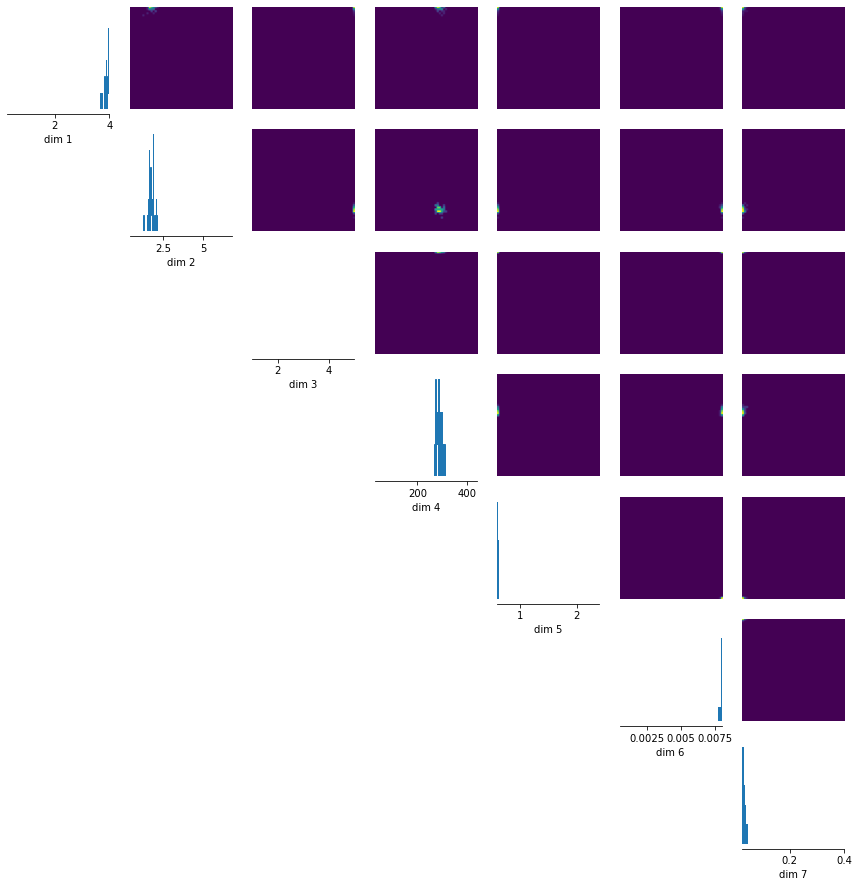

In [91]:
_ = analysis.pairplot(sample, limits=[(0.25,4.), (0.425,6.8), (1.,5.), (27.5,440), (0.6, 2.4), (5e-4, 0.008), (0.025,0.4)], figsize=(15, 15))

In [17]:
sam_path   = '/mnt/home/yjo10/ceph/ILI/SAM/one_click_sam'
num  = 1
file = open(f"./data/posterior/{num}.pkl",'rb')
post_load = pickle.load(file)
file.close()
observation = np.load('{}/result/obs_target.npy'.format(sam_path))
post_load = post_load.set_default_x(observation)

Sample: 100%|██████████| 1011/1011 [13:17,  1.27it/s, step size=2.80e-02, acc. prob=0.987]


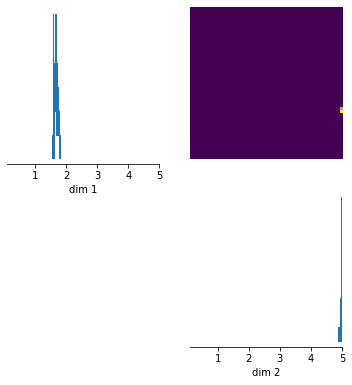

In [18]:
sam = post_load.sample((100,))
_ = analysis.pairplot(sam, limits=[[0.1, 5], [0.1, 5]], figsize=(6, 6))